In [1]:
# Credit Card Fraud Detection
# The dataset has been sourced from Kaggle competition IEEE-CIS Fraud Detection.
# https://www.kaggle.com/c/ieee-fraud-detection/data


In [45]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
# Input data files are available in the "C:\work\data\ML\ieee-fraud-detection" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/work/data/ML/ieee-fraud-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:/work/data/ML/ieee-fraud-detection\Data Description.rtf
C:/work/data/ML/ieee-fraud-detection\Data Description.txt
C:/work/data/ML/ieee-fraud-detection\sample_submission.csv
C:/work/data/ML/ieee-fraud-detection\test_identity.csv
C:/work/data/ML/ieee-fraud-detection\test_transaction.csv
C:/work/data/ML/ieee-fraud-detection\train_identity.csv
C:/work/data/ML/ieee-fraud-detection\train_transaction.csv


In [3]:
os.listdir('C:/work/data/ML/ieee-fraud-detection')

['Data Description.rtf',
 'Data Description.txt',
 'sample_submission.csv',
 'test_identity.csv',
 'test_transaction.csv',
 'train_identity.csv',
 'train_transaction.csv']

In [4]:
train_iden_df = pd.read_csv("C:/work/data/ML/ieee-fraud-detection/train_identity.csv")
train_trans_df = pd.read_csv("C:/work/data/ML/ieee-fraud-detection/train_transaction.csv")
test_trans_df = pd.read_csv("C:/work/data/ML/ieee-fraud-detection/test_transaction.csv")
test_iden_df = pd.read_csv("C:/work/data/ML/ieee-fraud-detection/test_identity.csv")

In [5]:
# shape, this gives the dimensions of the dataset
print('Dimensions of the Train Identity set:',train_iden_df.shape)
print('Dimensions of the Train transaction set:',train_trans_df.shape)
print('Dimensions of the Test transaction set:',test_trans_df.shape)
print('Dimensions of the Test Identity set:',test_iden_df.shape)

Dimensions of the Train Identity set: (144233, 41)
Dimensions of the Train transaction set: (590540, 394)
Dimensions of the Test transaction set: (506691, 393)
Dimensions of the Test Identity set: (141907, 41)


#  Examine data

In [6]:
train_iden_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
train_trans_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Checkign if all Transactions IDs from transaction dataset are in identity dataset
print(np.sum(train_trans_df['TransactionID'].isin(train_iden_df['TransactionID'].unique())))
print(np.sum(test_trans_df['TransactionID'].isin(test_iden_df['TransactionID'].unique())))

144233
141907


In [9]:
# Merge both the transaction and identity by left
train_df=pd.merge(train_trans_df,train_iden_df,how="left",on="TransactionID")
test_df=pd.merge(test_trans_df,test_iden_df,how="left",on="TransactionID")

In [10]:
# Print Shapes
print("Train Dataset shape: ", train_df.shape)
print("Test Dataset shape: ", test_df.shape)

Train Dataset shape:  (590540, 434)
Test Dataset shape:  (506691, 433)


#### Examine Merged Dataset for Train and Test

In [11]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [12]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Reduce Memory Usage

In [13]:
# This Step is done to reduce memory by conversion
# convert it to the low memory to fit the RAM
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [14]:
# Using  above function to reduce memory usage for Train test df
train_df=reduce_mem_usage(train_df)
test_df=reduce_mem_usage(test_df)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


In [15]:
# delete the 4 variables in order to reduce the memory issue
del train_iden_df
del train_trans_df
del test_trans_df
del test_iden_df

In [16]:
# Explore Categorical features
print('Training set:')
for col_name in train_df.columns:
    if train_df[col_name].dtypes == 'object' :
        unique_cat = len(train_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print("****************")
    
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Training set:
Feature 'ProductCD' has 5 categories
Feature 'card4' has 5 categories
Feature 'card6' has 5 categories
Feature 'P_emaildomain' has 60 categories
Feature 'R_emaildomain' has 61 categories
Feature 'M1' has 3 categories
Feature 'M2' has 3 categories
Feature 'M3' has 3 categories
Feature 'M4' has 4 categories
Feature 'M5' has 3 categories
Feature 'M6' has 3 categories
Feature 'M7' has 3 categories
Feature 'M8' has 3 categories
Feature 'M9' has 3 categories
Feature 'id_12' has 3 categories
Feature 'id_15' has 4 categories
Feature 'id_16' has 3 categories
Feature 'id_23' has 4 categories
Feature 'id_27' has 3 categories
Feature 'id_28' has 3 categories
Feature 'id_29' has 3 categories
Feature 'id_30' has 76 categories
Feature 'id_31' has 131 categories
Feature 'id_33' has 261 categories
Feature 'id_34' has 5 categories
Feature 'id_35' has 3 categories
Feature 'id_36' has 3 categories
Feature 'id_37' has 3 categories
Feature 'id_38' has 3 categories
Feature 'DeviceType' has 3 ca

##### Observe Basics statics using describe method

In [17]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2.987000e+06,3.134635e+06,3282269.50,3429904.25,3577539.0
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000000e+00,0.000000e+00,0.00,0.00,1.0
TransactionDT,590540.0,7.372311e+06,4.617224e+06,8.640000e+04,3.027058e+06,7306527.50,11246620.00,15811131.0
TransactionAmt,590540.0,NaN,NaN,2.509766e-01,4.331250e+01,68.75,125.00,31936.0
card1,590540.0,9.898735e+03,4.901170e+03,1.000000e+03,6.019000e+03,9678.00,14184.00,18396.0
...,...,...,...,...,...,...,...,...
id_22,5169.0,inf,6.898438e+00,1.000000e+01,1.400000e+01,14.00,14.00,44.0
id_24,4747.0,1.282031e+01,2.371094e+00,1.100000e+01,1.100000e+01,11.00,15.00,26.0
id_25,5132.0,inf,9.743750e+01,1.000000e+02,3.210000e+02,321.00,371.00,548.0
id_26,5163.0,inf,3.209375e+01,1.000000e+02,1.190000e+02,149.00,169.00,216.0


In [18]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype in ['object']]
train_df[cat_cols].describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


Count Plot for Fraudulent vs legitimate transaction


0    96.500999
1     3.499001
Name: isFraud, dtype: float64

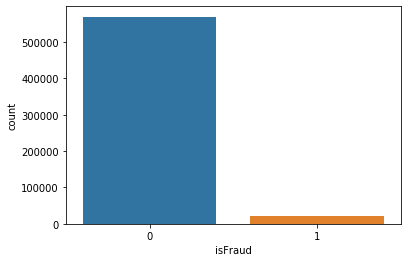

In [34]:
# Visualize target variable.(isFraud)
sns.countplot(train_df['isFraud'])
print("Count Plot for Fraudulent vs legitimate transaction") ## Imbalanced Dataset
train_df['isFraud'].value_counts(normalize=True) * 100

In [20]:
perc_fraud = len(train_df[train_df['isFraud']==1].index)*100/train_df.shape[0]
print("Percentage of Fradaulent records in dataset {:.2f}".format(perc_fraud) )

Percentage of Fradaulent records in dataset 3.50


#### Clean Data - Missing - NAN data

In [21]:
# Check missing data - Many Columns have more than 50% NA/Null records
def missing_data(df) :
    count = df.isnull().sum()
    percent = (df.isnull().sum()) / (df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    for col in df.columns :
        dtypes = str(df[col].dtype)
        types.append(dtypes)
    total['dtypes'] = types
    
    return np.transpose(total)

missing_data(train_df)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Count,0,0,0,0,0,0,8933,1565,1577,4259,...,450258,512954,517251,512735,449555,449555,449555,449555,449730,471874
Percent,0,0,0,0,0,0,1.51268,0.265012,0.267044,0.721204,...,76.2451,86.8619,87.5895,86.8248,76.1261,76.1261,76.1261,76.1261,76.1557,79.9055
dtypes,int32,int8,int32,float16,object,int16,float16,float16,object,float16,...,object,float16,object,object,object,object,object,object,object,object


In [32]:
## WE will Drop columns with more 50% Null value.
null_percent = train_df.isnull().sum()/train_df.shape[0]*100

cols_to_drop = np.array(null_percent[null_percent > 50].index)

cols_to_drop

array([], dtype=object)

In [33]:
# Drop Columns (cols_to_drop) from train and test
train_df = train_df.drop(cols_to_drop, axis=1)
test_df = test_df.drop(cols_to_drop,axis=1)
print(train_df.shape)
print(test_df.shape)

(590540, 220)
(506691, 219)


In [25]:
### Fill NaNs

train_df = train_df.fillna(-999)
test_df = test_df.fillna(-999)

## Feature Engineering
#### TransactionDT : timedelta from a given reference datetime (not an actual timestamp)

In [40]:
# show TransactionDT data

print(train_df['TransactionDT'].head())
print(train_df['TransactionDT'].tail())
print(test_df['TransactionDT'].head())
print(test_df['TransactionDT'].tail())

0    86400
1    86401
2    86469
3    86499
4    86506
Name: TransactionDT, dtype: int32
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, dtype: int32
0    18403224
1    18403263
2    18403310
3    18403310
4    18403317
Name: TransactionDT, dtype: int32
506686    34214279
506687    34214287
506688    34214326
506689    34214337
506690    34214345
Name: TransactionDT, dtype: int32


In [41]:
# 86400 is 24 * 3600. It's assumed to one day. How many days the total time is.
print(((15811131 - 86400) + (34214345 - 18403224)) / 86400)

364.998287037037


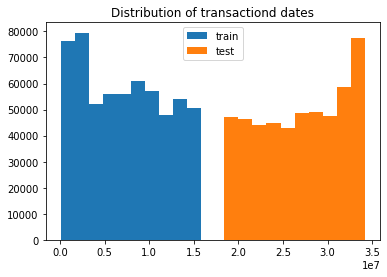

In [46]:
# TransactionDT graph

plt.hist(train_df['TransactionDT'], label='train');
plt.hist(test_df['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

### TBD 
#### create features like - which day of week has more fraud, transactions having three decimal place are more likely a fraud as these seems to be an international tranactions

#### Creating target (train_y) and feature variable (train_X)

In [76]:
train_y = train_df['isFraud']
train_X = train_df.drop('isFraud', axis=1)

test_y = test_df['isFraud']
test_X = test_df.drop('isFraud', axis=1)

KeyError: 'isFraud'

In [70]:
#print(train_y.head())
#print(train_y)
#print(train_X.head())
#print("Number of ""Fraud"" in original training data",len(train_y[train_y['isFraud']==0]))

## Over-sampling using SMOTE
It's highly imbalance data as no.ofFrauds are very less ~ 3.5% .I’ll up-sample the Fraud transactions(rows) using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 

At a high level, SMOTE:
Works by creating synthetic samples from the minor class (Fraud) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [50]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = train_X.columns
os_data_X, os_data_y = os.fit_sample(train_X, train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


length of oversampled data is  1139754
Number of Fraud in oversampled data 569877
Number of no fraud 569877
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [68]:
# we can Check the numbers of our data
#print(os_data_y.describe().transpose())
print("length of original training data is ",len(train_X))
#print("Number of ""Fraud"" in original training data",len(train_y[train_y['isFraud']==0]))
print("length of oversampled data is ",len(os_data_X))
print("Number of ""Fraud"" in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of ""no fraud""",len(os_data_y[os_data_y['y']==1]))
print("Proportion of Fraud data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of no fraud data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

       count  mean  std  min  25%  50%  75%  max
y  1139754.0   0.5  0.5  0.0  0.0  0.5  1.0  1.0
length of original training data is  590540
length of oversampled data is  1139754
Number of Fraud in oversampled data 569877
Number of no fraud 569877
Proportion of Fraud data in oversampled data is  0.5
Proportion of no fraud data in oversampled data is  0.5


In [72]:
# Label Encoding for categorical variables.
for f in os_data_X.columns:
    if os_data_X[f].dtype=='object' or test_df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(os_data_X[f].values) + list(test_df[f].values))
        os_data_X[f] = lbl.transform(list(os_data_X[f].values))
        test_df[f] = lbl.transform(list(test_df[f].values))

In [73]:
## Create Base Model - LogisticRegression

logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [79]:
y_pred = logreg.predict(test_df)
print(y_pred)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

[0 0 0 ... 0 0 1]


#### Predicting target for test data (test_df)
##### File : sample_submission.csv

In [77]:
submission = pd.read_csv('C:/work/data/ML/ieee-fraud-detection/sample_submission.csv',index_col='TransactionID')
submission['isFraud'] = logreg.predict_proba(test_df)[:,1]
submission.to_csv('Logreg_submission.csv')
submission.head()

,isFraud
TransactionID,
3663549,0.152139
3663550,0.216809
3663551,0.351589
3663552,0.445190
3663553,0.446662
